In [141]:
import matplotlib.pyplot as plt
import numpy as np
import pickle
from sklearn.metrics import pairwise_distances
import pandas as pd
import scipy.stats as ss
import seaborn as sns

z_thresh = 4
n_baseline_frames = 5

In [142]:
def compute_single_baseline(cell_trace,n_baseline_frames):

    nfreq = list(cell_trace.keys())
    nInt = list(cell_trace[nfreq[0]].keys())
    nrep = list(cell_trace[nfreq[0]][nInt[0]].keys())

    trials = (np.array([[[cell_trace[i][j][k] for k in nrep] for j in nInt] for i in nfreq]))
    baselines = trials[:,:,:,:n_baseline_frames]
    
    return baselines

In [143]:
def get_zscored_response(trial,baselines,n_baseline_frames):
    response = trial[n_baseline_frames:]

    baseline_mean = np.average(baselines)
    baseline_std = np.std(baselines)

    zscorer = lambda x: (x-baseline_mean)/baseline_std
    zscore_response = np.array([zscorer(xi) for xi in response])

    return zscore_response

In [144]:
saline_1_435 = "F:/Two-Photon/Psilocybin Project/Adaptation Cohort/ID435/saline/TSeries-08072023-1534-109/suite2p/plane0/cells.pkl"
saline_2_435 = "F:/Two-Photon/Psilocybin Project/Adaptation Cohort/ID435/saline/TSeries-08072023-1534-110/suite2p/plane0/cells.pkl"

saline_1_436 = "F:/Two-Photon/Psilocybin Project/Adaptation Cohort/ID436/saline/TSeries-08072023-1534-111/suite2p/plane0/cells.pkl"
saline_2_436 = "F:/Two-Photon/Psilocybin Project/Adaptation Cohort/ID436/saline/TSeries-08072023-1534-112/suite2p/plane0/cells.pkl"

saline_1_437 = "F:/Two-Photon/Psilocybin Project/Adaptation Cohort/ID437/saline/TSeries-08072023-1534-113/suite2p/plane0/cells.pkl"
saline_2_437 = "F:/Two-Photon/Psilocybin Project/Adaptation Cohort/ID437/saline/TSeries-08072023-1534-115/suite2p/plane0/cells.pkl"

saline_1_439 = "F:/Two-Photon/Psilocybin Project/Adaptation Cohort/ID439/saline_25092023/TSeries-01142009-2331-128/suite2p/plane0/cells.pkl"
saline_2_439 = "F:/Two-Photon/Psilocybin Project/Adaptation Cohort/ID439/saline_25092023/TSeries-01142009-2331-129/suite2p/plane0/cells.pkl"

saline_1_488 = "F:/Two-Photon/Psilocybin Project/Adaptation Cohort/ID488/saline/TSeries-10132023-1324-145/suite2p/plane0/cells.pkl"
saline_2_488 = "F:/Two-Photon/Psilocybin Project/Adaptation Cohort/ID488/saline/TSeries-10132023-1324-146/suite2p/plane0/cells.pkl"

saline_1_489 = "F:/Two-Photon/Psilocybin Project/Adaptation Cohort/ID489/saline/TSeries-10132023-1324-147/suite2p/plane0/cells.pkl"
saline_2_489 = "F:/Two-Photon/Psilocybin Project/Adaptation Cohort/ID489/saline/TSeries-10132023-1324-148/suite2p/plane0/cells.pkl"



all_dicts_saline_1 = [saline_1_435,saline_1_436,saline_1_437,saline_1_439,saline_1_488,saline_1_489]
all_dicts_saline_2 = [saline_2_435,saline_2_436,saline_2_437,saline_2_439,saline_2_488,saline_2_489]
all_dicts_saline_1_str = ["saline_1_435","saline_1_436","saline_1_437","saline_1_439","saline_1_488","saline_1_489"]
all_dicts_saline_2_str =  ["saline_2_435","saline_2_436","saline_2_437","saline_2_439","saline_2_488","saline_2_489"]
saline_dict_1 ={}
saline_dict_2 = {}

for file in all_dicts_saline_1_str:
    saline_dict_1[file]=None

for file in all_dicts_saline_2_str:
    saline_dict_2[file] = None

zippedsaline = zip(all_dicts_saline_1, all_dicts_saline_1_str)
for k,v in zippedsaline:
    with open(k,'rb') as f:
        saline_dict_1[v] = pickle.load(f)

zippedpsilo = zip(all_dicts_saline_2, all_dicts_saline_2_str)
for k,v in zippedpsilo:
    with open(k,'rb') as f:
        saline_dict_2[v] = pickle.load(f)

In [145]:
cell_list_1 = list(saline_dict_1[all_dicts_saline_1_str[0]].keys())
dict_keys = list(saline_dict_1.keys())

nfreq = list(saline_dict_1[all_dicts_saline_1_str[0]][cell_list_1[0]]['traces'].keys())
nInt = list(saline_dict_1[all_dicts_saline_1_str[0]][cell_list_1[0]]['traces'][nfreq[0]].keys())
ntrial = list(saline_dict_1[all_dicts_saline_1_str[0]][cell_list_1[0]]['traces'][nfreq[5]][nInt[0]].keys())
# nfreq.insert(0, 12)
print(nfreq, nInt, ntrial)
print(dict_keys)

[4364, 5371, 6612, 8140, 10020, 12335, 15184, 18691, 23009, 28324, 34867, 42922] [65] [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 2

In [146]:
# This script goes through all the cells in the big saline dictionary, and identified the ones that have a significant response to the familiar stim within the first three trials.
# It then creates an extra dictionary sub-field as a key for that cell, entitled 'active_early', which contains a True or False Boollean.  

trials = [1, 2, 3]

for dict_key in saline_dict_1:
    cell_list = list(saline_dict_1[dict_key].keys())
    
    for cell_key in cell_list:
        first_three_zscore = []
        baselines = compute_single_baseline(saline_dict_1[dict_key][cell_key]['traces'], n_baseline_frames)
        
        # Flag to indicate whether 'active_early' has been set to True
        active_early_set = False
        
        for trial in trials:
            zscore = get_zscored_response(saline_dict_1[dict_key][cell_key]['traces'][12335][65][trial], baselines, n_baseline_frames)
            first_three_zscore.append(zscore)
            
        first_three_zscore = np.array(first_three_zscore)
        
        for i in range(first_three_zscore.shape[0]):
            stim_period = first_three_zscore[i, 4:]
            peak_response = np.max(stim_period)
            
            if peak_response >= z_thresh:
                saline_dict_1[dict_key][cell_key]['active_early'] = True
                active_early_set = True
                break  # Break out of the inner loop if 'active_early' is set to True
        
        # If 'active_early' is not set to True, label it as False
        if not active_early_set:
            saline_dict_1[dict_key][cell_key]['active_early'] = False
                               

In [148]:
# I need to iterate through the big dictionary and if a cell's 'active_early' is True, take the mean peak response for the first ten trials, and trials 11-20. 

trials_early = [1,2,3,4,5,6,7,8,9,10]
trials_late = [11,12,13,14,15,16,17,18,19,20]
median_trials_early = []
mean_trials_early = []
mean_trials_late = []
median_trials_late = []


for dict in saline_dict_1:
    cell_list = list(saline_dict_1[dict].keys())

    for cell in cell_list:
        if saline_dict_1[dict][cell]['active_early'] == True:
            trials_list_early = []
            trials_list_late = []

            baselines = compute_single_baseline(saline_dict_1[dict][cell]['traces'], n_baseline_frames)

            for trial in trials_early:
                trials_list_early.append(get_zscored_response(saline_dict_1[dict][cell]['traces'][12335][65][trial], baselines, n_baseline_frames))
            trials_list_early = np.array(trials_list_early)
            trials_list_early = np.max(trials_list_early,axis=1)
            median_trials_early.append(np.median(trials_list_early))

            for trial in trials_late:
                trials_list_late.append(get_zscored_response(saline_dict_1[dict][cell]['traces'][12335][65][trial], baselines, n_baseline_frames))
            trials_list_late = np.array(trials_list_late)
            trials_list_late = np.max(trials_list_late,axis=1)
            median_trials_late.append(np.median(trials_list_late))
            

print(median_trials_late)               


[0.5883539403335672, 1.452912403488878, 2.057527788428332, 1.2923802013140173, 1.3143922734459914, 1.7984731399311946, 1.6932729206311432, 1.1911019336370796, -0.13694805775039978, -0.11034171293382276, 1.4289925945011972, 4.082325278316228, 1.5304707088819596, 1.1487690706115652, 1.0973838962881692, 1.325299016057056, 1.4399600581124252, 1.5544035188828493, 4.703313752364162, 1.4199199219595093, 1.1626686608788412, 0.8030576393938758, 0.9436660708994804, 0.2975525549703464, 0.9039823049435736, 2.0299629819924503, 0.5788812401332016, 0.882732279070034, 1.1749148980451873, 1.4675645467063485, 2.093048977689624, 1.2510372024545875, 2.800110898232915, 0.8627685339997802, 5.287317361727435, 1.421170343271829, 1.0750003359922062, 6.7354807256007, 2.5671638065758318, 2.0767274195686785, 1.86110472486032, 0.6811408257605432, 3.5546045759373994, 0.9056170522099616, 0.9437527762709272, 0.9010493519771106, 3.4277066393728473, 1.8261821455586063, 1.7741694051029973, 2.781435485992155, 2.437763495

In [149]:
df_median_trials_1 = pd.DataFrame(columns=['Early','Late'])

pre = pd.DataFrame(median_trials_early)
post = pd.DataFrame(median_trials_late)

df_median_trials_1['Early'] = pre
df_median_trials_1['Late'] = post

C:\Users\Conor\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:black'` for same effect.
  warnings.warn(msg, FutureWarning)


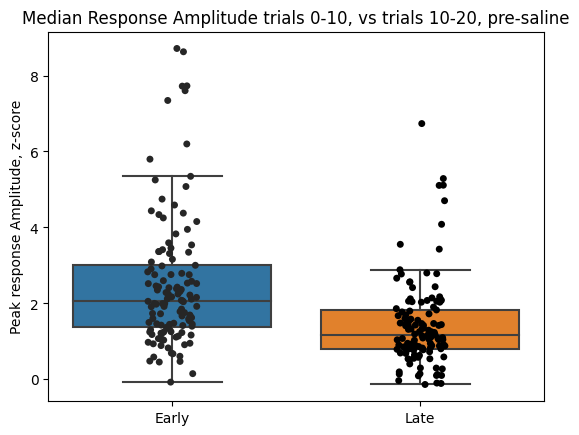

In [150]:
ax = sns.boxplot(data=df_median_trials_1,showfliers=False),
sns.stripplot(data=df_median_trials_1,color='black')
plt.ylabel("Peak response Amplitude, z-score")
plt.title("Median Response Amplitude trials 0-10, vs trials 10-20, pre-saline")
# plt.ylim(0, 35)

plt.show()

# SALINE DICT 2: POST-SALINE

In [151]:
# This script goes through all the cells in the big saline dictionary, and identified the ones that have a significant response to the familiar stim within the first three trials.
# It then creates an extra dictionary sub-field as a key for that cell, entitled 'active_early', which contains a True or False Boollean.  

trials = [1, 2, 3]

for dict_key in saline_dict_2:
    cell_list = list(saline_dict_2[dict_key].keys())
    
    for cell_key in cell_list:
        first_three_zscore = []
        baselines = compute_single_baseline(saline_dict_2[dict_key][cell_key]['traces'], n_baseline_frames)
        
        # Flag to indicate whether 'active_early' has been set to True
        active_early_set = False
        
        for trial in trials:
            zscore = get_zscored_response(saline_dict_2[dict_key][cell_key]['traces'][12335][65][trial], baselines, n_baseline_frames)
            first_three_zscore.append(zscore)
            
        first_three_zscore = np.array(first_three_zscore)
        
        for i in range(first_three_zscore.shape[0]):
            stim_period = first_three_zscore[i, 4:]
            peak_response = np.max(stim_period)
            
            if peak_response >= z_thresh:
                saline_dict_2[dict_key][cell_key]['active_early'] = True
                active_early_set = True
                break  # Break out of the inner loop if 'active_early' is set to True
        
        # If 'active_early' is not set to True, label it as False
        if not active_early_set:
            saline_dict_2[dict_key][cell_key]['active_early'] = False

In [152]:
trials_early = [1,2,3,4,5,6,7,8,9,10]
trials_late = [11,12,13,14,15,16,17,18,19,20]
median_trials_early_2 = []
mean_trials_early_2 = []
mean_trials_late = []
median_trials_late_2 = []


for dict in saline_dict_2:
    cell_list = list(saline_dict_2[dict].keys())

    for cell in cell_list:
        if saline_dict_2[dict][cell]['active_early'] == True:
            trials_list_early = []
            trials_list_late = []

            baselines = compute_single_baseline(saline_dict_2[dict][cell]['traces'], n_baseline_frames)

            for trial in trials_early:
                trials_list_early.append(get_zscored_response(saline_dict_2[dict][cell]['traces'][12335][65][trial], baselines, n_baseline_frames))
            trials_list_early = np.array(trials_list_early)
            trials_list_early = np.max(trials_list_early,axis=1)
            median_trials_early_2.append(np.median(trials_list_early))

            for trial in trials_late:
                trials_list_late.append(get_zscored_response(saline_dict_2[dict][cell]['traces'][12335][65][trial], baselines, n_baseline_frames))
            trials_list_late = np.array(trials_list_late)
            trials_list_late = np.max(trials_list_late,axis=1)
            median_trials_late_2.append(np.median(trials_list_late))
            

print(median_trials_late_2)     

[0.7493798007444986, 0.9151030124782873, 2.491813337812495, 0.6985023914505031, 0.8100121565880191, 1.7529905180063743, 1.8794803956381543, 2.517640774006016, 0.26602100494303016, 0.450968288127505, 1.3493910266318054, 0.2477639992083567, 0.46182737133996254, 0.28551110183837325, 2.2941767230869248, 1.3204462668695183, 1.2775467857010931, 0.9839637807186773, 1.1815561885513066, 1.1948306445306511, 5.704625676413675, 0.19767267712102843, 2.029130461908874, 0.7145087696593195, 0.6079175522984339, 3.3333316666911097, 1.1058807110361544, 2.022572804576592, 4.302812950986805, 1.236451154843018, 1.035852300404282, 1.3861434716060301, 4.308811076698063, 1.9372571966253576, 1.4472501620922524, 1.844414062387906, 2.572470781662244, 1.1873160609208075, 0.672795626588669, 0.7301319926740483, 0.1565074810440924, 1.3359740452808173, 1.049253572673903, 1.620056349050099, 0.9090829858975022, 0.022006967808422984, 0.3910154271834355, 0.6138353671889553, 0.9022050863156231, 1.5235508012189358, 1.326415

In [153]:
df_median_trials_2 = pd.DataFrame(columns=['Early','Late'])

pre = pd.DataFrame(median_trials_early_2)
post = pd.DataFrame(median_trials_late_2)

df_median_trials_2['Early'] = pre
df_median_trials_2['Late'] = post

C:\Users\Conor\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:black'` for same effect.
  warnings.warn(msg, FutureWarning)


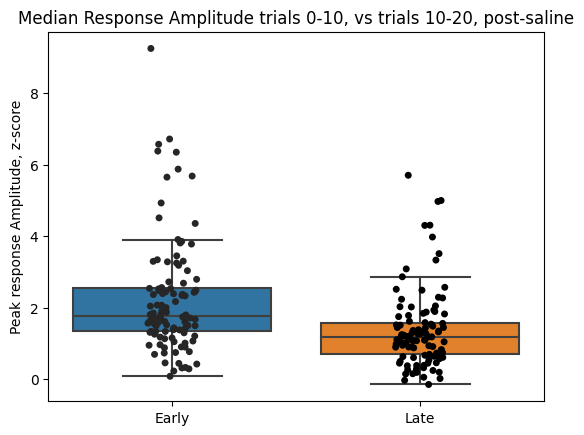

In [154]:
ax = sns.boxplot(data=df_median_trials_2,showfliers=False),
sns.stripplot(data=df_median_trials_2,color='black')
plt.ylabel("Peak response Amplitude, z-score")
plt.title("Mean Response Amplitude trials 0-10, vs trials 10-20, post-saline")
# plt.ylim(0, 35)

plt.show()

In [158]:
#  Calculate the difference between the two, for each condition.


differences_pre = [y - x for x, y in zip(median_trials_early, median_trials_late)]
differences_post = [y - x for x, y in zip(median_trials_early_2, median_trials_late_2)]



In [163]:
df_differences = pd.DataFrame(columns=['Pre-saline','Post-saline'])

pre = pd.DataFrame(differences_pre)
post = pd.DataFrame(differences_post)

df_differences['Pre-saline'] = pre
df_differences['Post-saline'] = post

C:\Users\Conor\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:black'` for same effect.
  warnings.warn(msg, FutureWarning)


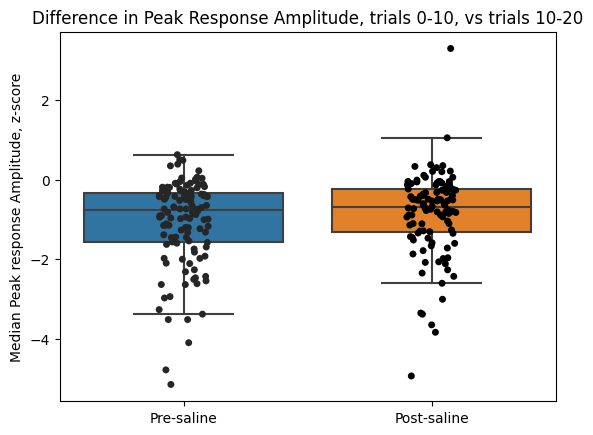

In [164]:
ax = sns.boxplot(data=df_differences,showfliers=False),
sns.stripplot(data=df_differences,color='black')
plt.ylabel("Median Peak response Amplitude, z-score")
plt.title("Difference in Peak Response Amplitude, trials 0-10, vs trials 10-20")
# plt.ylim(0, 35)

plt.show()

In [165]:
ss.ttest_ind(differences_pre,differences_post)

Ttest_indResult(statistic=-1.423247639089913, pvalue=0.15602531604293865)